<a href="https://colab.research.google.com/github/sayalidudhane/machinelearning/blob/main/SLRgrad_decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/AttendanceMarksSA (1).csv')
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


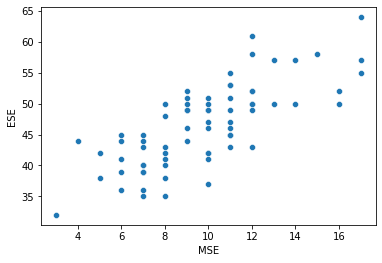

In [101]:
X = df['MSE']
Y = df['ESE']
sns.scatterplot(X, Y)

In [92]:
beta0 = 0
beta1 =  0
alpha = 0.01
count = 10000
n = float(len(X))

In [93]:
 
for i in range(count) :
  Ybar = beta1*X + beta0
  beta1 = beta1 - (alpha/n) *sum(X*(Ybar-Y)) 
  beta0 = beta0 - (alpha/n) *sum(Ybar-Y)
 
print(beta0, beta1)

30.66113097444092 1.6326392534114609


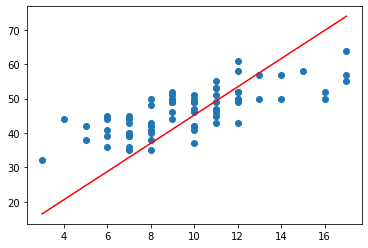

In [77]:
ybar = beta1*X + beta0
plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Ybar), max(Ybar)], color='red')
plt.show()

In [97]:
import math
def RSE(y_true, y_predicted) :
 
  y_true = np.array(y_true) 
  y_predicted = np.array(y_predicted) 
  RSS = np.sum(np.square(y_true - y_predicted)) 
  rse = math.sqrt(RSS / (len(y_true) -2)) 
  return rse
 
rse = RSE(df['ESE'], Ybar) 
print(rse)

4.396224828658142


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [100]:
x = np.array(df['MSE']).reshape(-1,1) 
y = np.array(df['ESE']).reshape(-1,1) 
 
lr = LinearRegression() 
lr.fit(x, y) 
 
print(lr.coef_) 
print(lr.intercept_)
 
yp = lr.predict(x)
rse = RSE(y, yp)
print(rse)

[[1.63215164]]
[30.66635246]
4.396224549647786
